# Notebook for running PEGG module

In [2]:
#import PEGG_v2 as pegg
import pandas as pd
import gzip
from Bio import SeqIO

In [32]:
import pegg
#!pip install pegg==1.0.1

In [11]:
#code for creating python script from notebook
#!jupyter nbconvert --to script PEGG_v2.ipynb


[NbConvertApp] Converting notebook PEGG_v2.ipynb to script
[NbConvertApp] Writing 96208 bytes to PEGG_v2.py


In [16]:
#results from TP53 <50 bp size query
clinvar = pd.read_csv('/Users/samgould/Desktop/clinvar_result.txt', sep='\t')

In [31]:
clinvar.iloc[[0]]

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NC_000017.11:g.7667874G>C,TP53,NaN,Hereditary cancer-predisposing syndrome,"Likely benign(Last reviewed: Apr 26, 2016)","criteria provided, single submitter",VCV000925574,17,7571192,17,7667874,925574,914159,rs1049800949,NC_000017.11:7667873:G:C,NaN


In [30]:
spdi = list(clinvar['Canonical SPDI'])
spdi = [i.split('NC_000017.11:')[1] for i in spdi] #there are all referenecs to GrCh38...
spdi

['7667873:G:C',
 '7667879:G:A',
 '7667887:G:A',
 '7667898:A:C',
 '7667900:C:T',
 '7667903:C:T',
 '7667905:C:T',
 '7667905:C:A',
 '7667907:C:A',
 '7667908:C:T',
 '7667909:C:A',
 '7667913:C:T',
 '7667922:T:G',
 '7667925:C:T',
 '7667928:C:T',
 '7667932:C:T',
 '7668133:G:A',
 '7668169:GCCGTGGCCG:GCCGTGGCCGTGGCCG',
 '7668202:CC:CCC',
 '7668387:C:G',
 '7668433:T:G',
 '7668448:A:C',
 '7668476:G:A',
 '7668538:G:A',
 '7668631:C:G',
 '7668672:T:C',
 '7668782:C:T',
 '7668802:G:T',
 '7668818:C:T',
 '7668829:G:',
 '7668835:G:A',
 '7668836:AAAAAAAAAAAAAAAAAA:AAAAAAAAAAAAAAAAA',
 '7668847:A:G',
 '7668848:A:G',
 '7668854:G:A',
 '7668861:G:A',
 '7668873:G:T',
 '7668982:G:A',
 '7668995:G:T',
 '7669038:AC:',
 '7669043:C:A',
 '7669060:C:A',
 '7669123:C:T',
 '7669199:G:T',
 '7669226:G:A',
 '7669251:A:G',
 '7669261:A:G',
 '7669262:C:A',
 '7669280:C:T',
 '7669281:G:A',
 '7669403:C:T',
 '7669440:G:A',
 '7669464:C:T',
 '7669509:C:T',
 '7669592:C:A',
 '7669593:A:G',
 '7669595:G:A',
 '7669599:TGGA:TGGATGGA',
 '7

In [6]:
filepath='/Users/samgould/Desktop/cellline_ccle_broad/data_mutations.txt'
ccle = pd.read_csv(filepath, sep='\t')

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_84732/1991226972.py:2: DtypeWarning: Columns (4,37,38,39,40,41,43,45,46,47,48,49,52,53,54,55,56,57,58,59,60,61,62,65,66,67,68,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  ccle = pd.read_csv(filepath, sep='\t')


In [33]:
#loading in required input files

#------loading in impact data set---------------------
filepath = '/Users/samgould/Desktop/FSR Lab/reference files/2020-06-16-MSK-IMPACT_EDITED.txt'
impact_data = pd.read_csv(filepath, sep='\t')



#------loading in reference genome and organizing it into a 2-d list by chromosome---------------------
file = '/Users/samgould/Desktop/FSR Lab/reference files/GRCh37/ncbi-genomes-2022-03-17/GCF_000001405.25_GRCh37.p13_genomic.fna.gz'

with gzip.open(file, "rt") as handle:
    records = list(SeqIO.parse(handle, "fasta")) #about 4 Gb in  memory
    #records = list that contains sequences split up by chromosome (and intrachromosome splits up to some size)

#filtering out alternative sequences to only select consensus chromosome sequences
wrong = ["alternate", "unplaced", "unlocalized", "patch"]
badlist = []
for key in wrong:
    for i in records:
        ii = i.description
        if key in ii:
            badlist.append(ii)
            
#creating an 
#filtered = []
index_list = []
for idx, i in enumerate(records):
    ii = i.description
    if ii not in badlist:
       # filtered.append(ii)
        index_list.append(idx)
        
          
    
#---------loading in on/off-target efficiencies of sgRNAs in exonic regions (doesn't include others...)---------------------
file = '/Users/samgould/Desktop/FSR Lab/reference files/chrom_dict.pickle'
chrom_dict = pd.read_pickle(file)

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_88809/2462139498.py:5: DtypeWarning: Columns (45,48,88) have mixed types. Specify dtype option on import or set low_memory=False.
  impact_data = pd.read_csv(filepath, sep='\t')


In [23]:
records[index_list[22]]

SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN'), id='NC_000023.10', name='NC_000023.10', description='NC_000023.10 Homo sapiens chromosome X, GRCh37.p13 Primary Assembly', dbxrefs=[])

In [3]:
index_list

[0,
 3,
 4,
 5,
 8,
 9,
 10,
 12,
 15,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 33,
 35,
 38,
 39,
 41,
 42,
 43,
 296]

In [35]:
#specify reference data
#mutant_input = impact_data
mutant_input = impact_data
#select list of mutations to model
mut_idx_list = [4]

PAM = 'NGG'
#if you want to check multiple RTT lengths/PBS lengths...
RTT_lengths = [20,25,30]
PBS_lengths = [5,7,10]

#generates minus strand sequences of chromosomes to speed up run time...
minus_seqs = pegg.minus_seq_generator(records, index_list)

#if no chrom_dict provided
#set chrom_dict = 'none'


In [36]:
mutant_input = impact_data

guides_per_mut=20
#desired number of guide outputs per mutation
mut_idx_list = [4]

ranked_filtered = pegg.run(mutant_input, mut_idx_list, records, index_list, minus_seqs, chrom_dict, PAM, RTT_lengths, PBS_lengths, guides_per_mut)
ranked_filtered

,mutant index,gene,chr,start,end,variant_type,ref_allele,mut_allele,PAM location,PAM strand,PAM,protospacer,PBS,PBS length,RTT,RTT length,PBS_RTT_5to3,distance mut to 5' RTT,distance to nick,target sequence,target length,MIT specificity,CFD efficiency percentile,contains terminator?,contains RE site?,last templated base C?,PBS GC content,composite score,target genomic edit
0,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,GTCTGCAGAA,10,AACTCCAAATAGGCGACGAAACAGG,25,GGACAAAGCAGCGGATAAACCTCAAAAGACGTCTG,17,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.500000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
1,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,TGCAGAA,7,AACTCCAAATAGGCGACGAAACAGG,25,GGACAAAGCAGCGGATAAACCTCAAAAGACGT,17,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.428571,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
2,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,GTCTGCAGAA,10,AACTCCAAATAGGCGACGAAACAGGAGTCT,30,TCTGAGGACAAAGCAGCGGATAAACCTCAAAAGACGTCTG,22,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.500000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
3,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,TGCAGAA,7,AACTCCAAATAGGCGACGAAACAGGAGTCT,30,TCTGAGGACAAAGCAGCGGATAAACCTCAAAAGACGT,22,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.428571,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
4,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,CAGAA,5,AACTCCAAATAGGCGACGAAACAGG,25,GGACAAAGCAGCGGATAAACCTCAAAAGAC,17,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.400000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
5,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,CAGAA,5,AACTCCAAATAGGCGACGAAACAGGAGTCT,30,TCTGAGGACAAAGCAGCGGATAAACCTCAAAAGAC,22,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.400000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
6,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251843,-,AGG,TTGGAACTGTGAGAACTCTG,AGTTCTC,7,TTTGAGGTTTATCCGCTGCTTTGTCCTCAG,30,TTTGAGGTTTATCCGCTGCTTTGTCCTCAGAGTTCTC,9,21,GACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCA...,60,64,99,no,no,no,0.428571,2.830000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
7,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251843,-,AGG,TTGGAACTGTGAGAACTCTG,AGTTC,5,TTTGAGGTTTATCCGCTGCTTTGTCCTCAG,30,TTTGAGGTTTATCCGCTGCTTTGTCCTCAGAGTTC,9,21,GACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCA...,60,64,99,no,no,no,0.400000,2.830000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
8,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251843,-,AGG,TTGGAACTGTGAGAACTCTG,AGTTCTCACA,10,TTTGAGGTTTATCCGCTGCTTTGTCCTCAG,30,TTTGAGGTTTATCCGCTGCTTTGTCCTCAGAGTTCTCACA,9,21,GACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCA...,60,64,99,no,no,no,0.400000,2.830000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...
9,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,GTCTGCAGAA,10,AACTCCAAATAGGCGACGAA,20,AAGCAGCGGATAAACCTCAAAAGACGTCTG,12,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.500000,2.710000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...


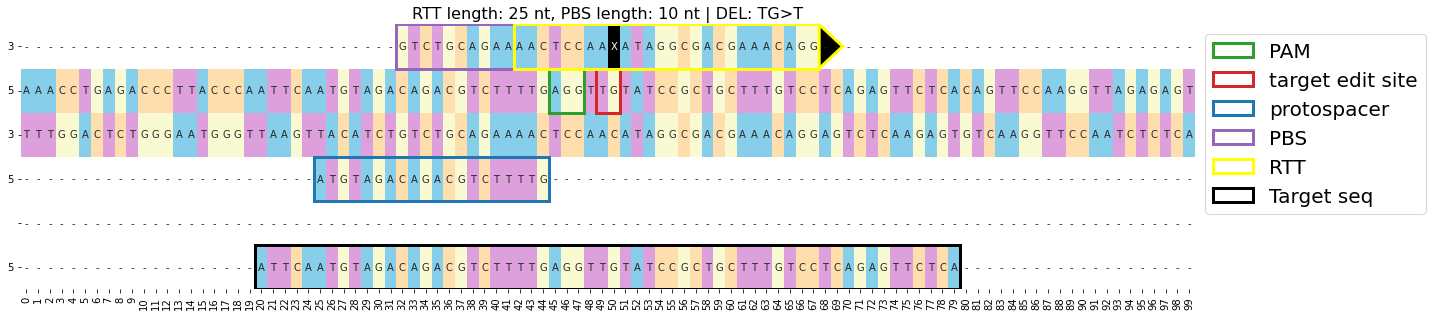

In [38]:
#visualization
pegRNA_df_loc=0 #choosing which guide to display from the above dataframe
h = pegg.pegrna_display(ranked_filtered, pegRNA_df_loc, records, index_list)

h.savefig('pegviz.png', dpi=250)


In [40]:
#another form of visualization
pegg.align_display(ranked_filtered[0:4], records, index_list)

AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCACAGTTCCAAGGTTAGAGAGT
                                |||||||||||||||||| |||||||||||||||||                                
--------------------------------CAGACGTCTTTTGAGGTT-TATCCGCTGCTTTGTCC--------------------------------
  Score=67

AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCACAGTTCCAAGGTTAGAGAGT
                                   ||||||||||||||| |||||||||||||||||                                
-----------------------------------ACGTCTTTTGAGGTT-TATCCGCTGCTTTGTCC--------------------------------
  Score=61

AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCACAGTTCCAAGGTTAGAGAGT
                                |||||||||||||||||| ||||||||||||||||||||||                           
--------------------------------CAGACGTCTTTTGAGGTT-TATCCGCTGCTTTGTCCTCAGA---------------------------
  Score=77

AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGAGGTTGTATC

In [44]:
oligos_no_sensor = pegg.oligo_generator(ranked_filtered, append_proto_G=True, sensor=False)


In [45]:
oligos_w_sensor = pegg.oligo_generator(ranked_filtered, sensor=True)
oligos_w_sensor

,mutant index,gene,chr,start,end,variant_type,ref_allele,mut_allele,PAM location,PAM strand,PAM,protospacer,PBS,PBS length,RTT,RTT length,PBS_RTT_5to3,distance mut to 5' RTT,distance to nick,target sequence,target length,MIT specificity,CFD efficiency percentile,contains terminator?,contains RE site?,last templated base C?,PBS GC content,composite score,target genomic edit,pegRNA_oligo,epegRNA_tevopreQ1_oligo
0,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,GTCTGCAGAA,10,AACTCCAAATAGGCGACGAAACAGG,25,GGACAAAGCAGCGGATAAACCTCAAAAGACGTCTG,17,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.500000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...
1,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,TGCAGAA,7,AACTCCAAATAGGCGACGAAACAGG,25,GGACAAAGCAGCGGATAAACCTCAAAAGACGT,17,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.428571,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...
2,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,GTCTGCAGAA,10,AACTCCAAATAGGCGACGAAACAGGAGTCT,30,TCTGAGGACAAAGCAGCGGATAAACCTCAAAAGACGTCTG,22,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.500000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...
3,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,TGCAGAA,7,AACTCCAAATAGGCGACGAAACAGGAGTCT,30,TCTGAGGACAAAGCAGCGGATAAACCTCAAAAGACGT,22,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.428571,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...
4,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,CAGAA,5,AACTCCAAATAGGCGACGAAACAGG,25,GGACAAAGCAGCGGATAAACCTCAAAAGAC,17,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.400000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...
5,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251819,+,AGG,ATGTAGACAGACGTCTTTTG,CAGAA,5,AACTCCAAATAGGCGACGAAACAGGAGTCT,30,TCTGAGGACAAAGCAGCGGATAAACCTCAAAAGAC,22,8,ATTCAATGTAGACAGACGTCTTTTGAGGTTGTATCCGCTGCTTTGT...,60,76,35,no,no,no,0.400000,3.110000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...,AGCGTACACGTCTCACACCGATGTAGACAGACGTCTTTTGGTTTTA...
6,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251843,-,AGG,TTGGAACTGTGAGAACTCTG,AGTTCTC,7,TTTGAGGTTTATCCGCTGCTTTGTCCTCAG,30,TTTGAGGTTTATCCGCTGCTTTGTCCTCAGAGTTCTC,9,21,GACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCA...,60,64,99,no,no,no,0.428571,2.830000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGTTGGAACTGTGAGAACTCTGGTTTTA...,AGCGTACACGTCTCACACCGTTGGAACTGTGAGAACTCTGGTTTTA...
7,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251843,-,AGG,TTGGAACTGTGAGAACTCTG,AGTTC,5,TTTGAGGTTTATCCGCTGCTTTGTCCTCAG,30,TTTGAGGTTTATCCGCTGCTTTGTCCTCAGAGTTC,9,21,GACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCA...,60,64,99,no,no,no,0.400000,2.830000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGTTGGAACTGTGAGAACTCTGGTTTTA...,AGCGTACACGTCTCACACCGTTGGAACTGTGAGAACTCTGGTTTTA...
8,4,BRCA1,chr17,41251824,41251825,DEL,TG,T,41251843,-,AGG,TTGGAACTGTGAGAACTCTG,AGTTCTCACA,10,TTTGAGGTTTATCCGCTGCTTTGTCCTCAG,30,TTTGAGGTTTATCCGCTGCTTTGTCCTCAGAGTTCTCACA,9,21,GACGTCTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGAGTTCTCA...,60,64,99,no,no,no,0.400000,2.830000,AAACCTGAGACCCTTACCCAATTCAATGTAGACAGACGTCTTTTGA...,AGCGTACACGTCTCACACCGTTGGAACTGTGAGAACTCTGGTTTTA...,AGCGTACACGTCTCACACCGTTGGAACTGTGAGAACTCTG

In [7]:
import gffutils

file = '/Users/samgould/Desktop/FSR Lab/reference files/gencode_v19.db'
db = gffutils.FeatureDB(file)

tx = 'ENST00000269305.4'
cds = list(db.children(tx, order_by='+end', featuretype=['CDS']))
strand = cds[0][6]

start_end_cds = [[i.start, i.end] for i in cds]
start_end_cds

[[7572930, 7573008],
 [7573927, 7574033],
 [7576853, 7576926],
 [7577019, 7577155],
 [7577499, 7577608],
 [7578177, 7578289],
 [7578371, 7578554],
 [7579312, 7579590],
 [7579700, 7579721],
 [7579839, 7579912]]

In [47]:
#testing automated library generation functions

gene_name='TP53'
strand = '-'
chrom='chr17'
#listing CDS of transcript ordered by +end
start_end_cds = [[7572930, 7573008],
 [7573927, 7574033],
 [7576853, 7576926],
 [7577019, 7577155],
 [7577499, 7577608],
 [7578177, 7578289],
 [7578371, 7578554],
 [7579312, 7579590],
 [7579700, 7579721],
 [7579839, 7579912]]
neutral_p53 = pegg.neutral_substitutions(gene_name, chrom, strand, start_end_cds, records, index_list)
neutral_p53

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,codon,ref_aa,mut_aa,classification
0,TP53,17,7579907,7579909,ONP,CTC,TTC,2,E,E,neutral
1,TP53,17,7579904,7579906,ONP,CTC,TTC,3,E,E,neutral
2,TP53,17,7579901,7579903,ONP,CGG,TGG,4,P,P,neutral
3,TP53,17,7579898,7579900,ONP,CTG,TTG,5,Q,Q,neutral
4,TP53,17,7579895,7579897,ONP,TGA,ACT,6,S,S,neutral
...,...,...,...,...,...,...,...,...,...,...,...
372,TP53,17,7572942,7572944,ONP,CCC,TCC,389,G,G,neutral
373,TP53,17,7572939,7572941,ONP,AGG,TGG,390,P,P,neutral
374,TP53,17,7572936,7572938,ONP,GTC,ATC,391,D,D,neutral
375,TP53,17,7572933,7572935,ONP,TGA,ACT,392,S,S,neutral


In [10]:
mutant_input=impact_data
pegg.mutation_aggregator(mutant_input, gene_name)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,...,MOTIF_SCORE_CHANGE,PHENO,PICK,PUBMED,PolyPhen,SAS_MAF,SIFT,SOMATIC,SWISSPROT,SYMBOL,SYMBOL_SOURCE,TREMBL,TSL,Transcript,UNIPARC,VARIANT_CLASS,all_effects,amino_acid_change,cDNA_Change,cDNA_position,cdna_change,comments,n_depth,t_depth,transcript
24,TP53,7157,MSKCC,GRCh37,17,7577120,7577120,+,missense_variant,Missense_Mutation,SNP,C,C,T,rs28934576,NaN,P-0013121-T05-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,TP53,7157,MSKCC,GRCh37,17,7577108,7577108,+,missense_variant,Missense_Mutation,SNP,C,C,A,rs763098116,NaN,P-0018318-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,TP53,7157,MSKCC,GRCh37,17,7578239,7578239,+,stop_gained,Nonsense_Mutation,SNP,C,C,A,NaN,NaN,P-0023858-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,TP53,7157,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,SNP,G,G,A,rs121913343,NaN,P-0028912-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,TP53,0,MSKCC,37,17,7576862,7576863,+,NaN,frameshift_deletion,DEL,GA,GA,G,NaN,NaN,P-0019689-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422121,TP53,7157,MSKCC,GRCh37,17,7578438,7578438,+,missense_variant,Missense_Mutation,SNP,C,C,G,NaN,NaN,P-0048568-T01-XS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422202,TP53,7157,MSKCC,GRCh37,17,7577531,7577532,+,frameshift_variant,Frame_Shift_Del,DEL,GG,GG,-,NaN,NaN,P-0049134-T01-XS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422376,TP53,7157,MSKCC,GRCh37,17,7578524,7578551,+,protein_altering_variant,In_Frame_Del,DEL,GGCAAAACATCTTGTTGAGGGCAGGGGA,GGCAAAACATCTTGTTGAGGGCAGGGGA,T,NaN,NaN,P-0050684-T01-XS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422619,TP53,7157,MSKCC,GRCh37,17,7578421,7578440,+,frameshift_variant,Frame_Shift_Del,DEL,GTCATGTGCTGTGACTGCTT,GTCATGTGCTGTGACTGCTT,-,NaN,NaN,P-0052302-T01-XS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
control_fraction=.01
mutant_input=impact_data
library_input = pegg.library_input_generator(mutant_input, gene_name, chrom, strand, start_end_cds, records, index_list, control_fraction)
library_input


,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,codon,ref_aa,mut_aa,classification,Entrez_Gene_Id,Center,NCBI_Build,Strand,Consequence,Variant_Classification,Tumor_Seq_Allele1,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,...,MOTIF_SCORE_CHANGE,PHENO,PICK,PUBMED,PolyPhen,SAS_MAF,SIFT,SOMATIC,SWISSPROT,SYMBOL,SYMBOL_SOURCE,TREMBL,TSL,Transcript,UNIPARC,VARIANT_CLASS,all_effects,amino_acid_change,cDNA_Change,cDNA_position,cdna_change,comments,n_depth,t_depth,transcript
0,TP53,17,7579907,7579909,ONP,CTC,TTC,2.0,E,E,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TP53,17,7579874,7579876,ONP,AGG,TGG,13.0,P,P,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TP53,17,7579721,7579840,ONP,TAG,TAA,25.0,L,L,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TP53,17,7579579,7579581,ONP,CGG,TGG,36.0,P,P,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TP53,17,7579540,7579542,ONP,ATC,GTC,49.0,D,D,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,TP53,17,7578438,7578438,SNP,C,G,NaN,NaN,NaN,NaN,7157.0,MSKCC,GRCh37,+,missense_variant,Missense_Mutation,C,NaN,NaN,P-0048568-T01-XS1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,TP53,17,7577531,7577532,DEL,GG,-,NaN,NaN,NaN,NaN,7157.0,MSKCC,GRCh37,+,frameshift_variant,Frame_Shift_Del,GG,NaN,NaN,P-0049134-T01-XS1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3343,TP53,17,7578524,7578551,DEL,GGCAAAACATCTTGTTGAGGGCAGGGGA,T,NaN,NaN,NaN,NaN,7157.0,MSKCC,GRCh37,+,protein_altering_variant,In_Frame_Del,GGCAAAACATCTTGTTGAGGGCAGGGGA,NaN,NaN,P-0050684-T01-XS1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3344,TP53,17,7578421,7578440,DEL,GTCATGTGCTGTGACTGCTT,-,NaN,NaN,NaN,NaN,7157.0,MSKCC,GRCh37,+,frameshift_variant,Frame_Shift_Del,GTCATGTGCTGTGACTGCTT,NaN,NaN,P-0052302-T01-XS1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
library_input[library_input['classification']=='neutral']

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,codon,ref_aa,mut_aa,classification,Entrez_Gene_Id,Center,NCBI_Build,Strand,Consequence,Variant_Classification,Tumor_Seq_Allele1,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,...,MOTIF_SCORE_CHANGE,PHENO,PICK,PUBMED,PolyPhen,SAS_MAF,SIFT,SOMATIC,SWISSPROT,SYMBOL,SYMBOL_SOURCE,TREMBL,TSL,Transcript,UNIPARC,VARIANT_CLASS,all_effects,amino_acid_change,cDNA_Change,cDNA_position,cdna_change,comments,n_depth,t_depth,transcript
0,TP53,17,7579907,7579909,ONP,CTC,TTC,2.0,E,E,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TP53,17,7579874,7579876,ONP,AGG,TGG,13.0,P,P,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TP53,17,7579721,7579840,ONP,TAG,TAA,25.0,L,L,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TP53,17,7579579,7579581,ONP,CGG,TGG,36.0,P,P,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TP53,17,7579540,7579542,ONP,ATC,GTC,49.0,D,D,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TP53,17,7579504,7579506,ONP,ATC,GTC,61.0,D,D,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TP53,17,7579468,7579470,ONP,CAC,TAC,73.0,V,V,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TP53,17,7579435,7579437,ONP,GGC,TGC,84.0,A,A,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TP53,17,7579399,7579401,ONP,AGA,ACT,96.0,S,S,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TP53,17,7579366,7579368,ONP,GTA,ATA,107.0,Y,Y,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#specify reference data
mutant_input = library_input
#select list of mutations to model
mut_idx_list = range(len(mutant_input))

PAM = 'NGG'
#if you want to check multiple RTT lengths/PBS lengths...
RTT_lengths = [20,25,30]
PBS_lengths = [5,7,10]

#generates minus strand sequences of chromosomes to speed up run time...
minus_seqs = pegg.minus_seq_generator(records, index_list)


In [52]:
guides_per_mut=1
ranked_filtered = pegg.run(mutant_input, mut_idx_list, records, index_list, minus_seqs, chrom_dict, PAM, RTT_lengths, PBS_lengths, guides_per_mut)
ranked_filtered

,mutant index,gene,chr,start,end,variant_type,ref_allele,mut_allele,PAM location,PAM strand,PAM,protospacer,PBS,PBS length,RTT,RTT length,PBS_RTT_5to3,distance mut to 5' RTT,distance to nick,target sequence,target length,MIT specificity,CFD efficiency percentile,contains terminator?,contains RE site?,last templated base C?,PBS GC content,composite score,target genomic edit
0,0,TP53,chr17,7579907,7579909,ONP,CTC,TTC,7579900,+,CGG,TCGACGCTAGGATCTGACTG,ATCCTAGACT,10,GACGCCGAGAAGGTACCGTCACTGG,25,GGTCACTGCCATGGAAGAGCCGCAGTCAGATCCTA,15,10,GGGGCTCGACGCTAGGATCTGACTGCGGCTCCTCCATGGCAGTGAC...,60,93,100,no,no,no,0.400000,3.930000,ATGTTTCCTGACTCAGAGGGGGCTCGACGCTAGGATCTGACTGCGG...
1,1,TP53,chr17,7579874,7579876,ONP,AGG,TGG,7579875,+,GGG,AAATGTTTCCTGACTCAGAG,ACTGAGT,7,CACCCCCGAGCTGCGATCCTAGACT,25,TCAGATCCTAGCGTCGAGCCCCCACTGAGTCA,23,2,TCTGAAAATGTTTCCTGACTCAGAGGGGGCTCGACGCTAGGATCTG...,60,67,97,no,no,no,0.428571,3.640000,ATGGATCCACTCACAGTTTCCATAGGTCTGAAAATGTTTCCTGACT...
2,3,TP53,chr17,7579579,7579581,ONP,CGG,TGG,7579578,+,CGG,AAATCATCCATTGCTTGGGA,GGTAACGAAC,10,CCTACCGTTCCCCCTGACATCTACCCACTT,30,TTCACCCATCTACAGTCCCCCTTGCCATCCCAAGCAATGG,26,4,GCATCAAATCATCCATTGCTTGGGACGGCAAGGGGGACTGTAGATG...,60,69,78,no,no,no,0.500000,3.470000,ATTGTTCAATATCGTCCGGGGACAGCATCAAATCATCCATTGCTTG...
3,4,TP53,chr17,7579540,7579542,ONP,ATC,GTC,7579547,-,CGG,GGATGATTTGATGCTGTCCC,ACAGC,5,AACCATTGTTCAATGTCGTCCGGGG,25,AACCATTGTTCAATGTCGTCCGGGGACAGC,17,8,TGGGTCTTCAGTGAACCATTGTTCAATATCGTCCGGGGACAGCATC...,60,75,59,no,no,no,0.600000,3.340000,TTCTGGGAGCTTCATCTGGACCTGGGTCTTCAGTGAACCATTGTTC...
4,5,TP53,chr17,7579504,7579506,ONP,ATC,GTC,7579513,-,AGG,CAATGGTTCACTGAAGACCC,TCTTC,5,TCTGGGAGCTTCGTCTGGACCTGGG,25,TCTGGGAGCTTCGTCTGGACCTGGGTCTTC,15,10,CAGCCTCTGGCATTCTGGGAGCTTCATCTGGACCTGGGTCTTCAGT...,60,73,97,no,no,no,0.400000,3.700000,CTGGTGCAGGGGCCACGGGGGGAGCAGCCTCTGGCATTCTGGGAGC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3341,TP53,chr17,7578438,7578438,SNP,C,G,7578451,-,TGG,CGGCACCCGCGTCCGCGCCA,CGCGGAC,7,TGTGCTGTGACTGGTTGTAGATGGCCATGG,30,TGTGCTGTGACTGGTTGTAGATGGCCATGGCGCGGAC,14,16,GAAGTCTCATGGAAGCCAGCCCCTCAGGGCAACTGACCGTGCAAGT...,60,87,23,no,no,no,0.857143,1.680952,GCTCATGGTGGGGGCAGCGCCTCACAACCTCCGTCATGTGCTGTGA...
3032,3342,TP53,chr17,7577531,7577532,DEL,GG,-,7577536,-,AGG,GCATGGGCGGCATGAACCGG,GTTCATGCCG,10,TCCAGTGTGATGATGGTGAGGATGCCTCCG,30,TCCAGTGTGATGATGGTGAGGATGCCTCCGGTTCATGCCG,23,7,CTTGTAGATGGCCATGGCGCGGACGCGGGTGCCGGGCGGGGGTGTG...,60,79,75,no,no,no,0.600000,3.540000,GGCAAGTGGCTCCTGACCTGGAGTCTTCCAGTGTGATGATGGTGAG...
3033,3343,TP53,chr17,7578524,7578551,DEL,GGCAAAACATCTTGTTGAGGGCAGGGGA,T,7578522,+,TGG,CAGGGCAGGTCTTGGCCAGT,CCAGAACCGG,10,TCAAACATGACATCCTTCTCCTTCCTCTGT,30,TGTCTCCTTCCTCTTCCTACAGTACAAACTGGCCAAGACC,25,5,GACGCGGGTGCCGGGCGGGGGTGTGGAATCAACCCACAGCTGCACA...,60,66,50,no,no,no,0.700000,2.660000,GGGGGTGTGGAATCAACCCACAGCTGCACAGGGCAGGTCTTGGCCA...
3034,3344,TP53,chr17,7578421,7578440,DEL,GTCATGTGCTGTGACTGCTT,-,7578396,+,TGG,TATCTGAGCAGCGCTCATGG,CGAGT,5,ACCACCCCCGTCGCGGAGTGTTGGAGGCAT,30,TACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGC,2,28,ACGCGGGTGCCGGGCGGGGGTGTGGAATCAACCCACAGCTGCACAG...,60,88,84,no,no,no,0.600000,1.986667,ATCGCTATCTGAGCAGCGCTCATGGTGGGGGCAGCGCCTCACAACC...


In [58]:
#generating the pegRNA library
#same input required as shown previously
ranked_filtered = pegg.run(mutant_input, mut_idx_list, records, index_list, minus_seqs, chrom_dict, PAM, RTT_lengths, PBS_lengths, guides_per_mut)

#adding HGVSp information back to the dataframe if it's available...
hg = []
for i, val in ranked_filtered.iterrows():
    idx = val['mutant index']
    hgvsp = mutant_input.loc[[idx]]['HGVSp'].values[0]
    hg.append(hgvsp)
    
#also add in information for identifying neutral mutations
class_mut = []
for i, val in ranked_filtered.iterrows():
    idx = val['mutant index']
    neut = mutant_input.loc[[idx]]['classification'].values[0]
    class_mut.append(neut)

ranked_filtered['HGVSp']=hg
ranked_filtered['classification']=class_mut



In [59]:
ranked_filtered['classification']

0       neutral
1       neutral
2       neutral
3       neutral
4       neutral
         ...   
3031        NaN
3032        NaN
3033        NaN
3034        NaN
3035        NaN
Name: classification, Length: 3036, dtype: object

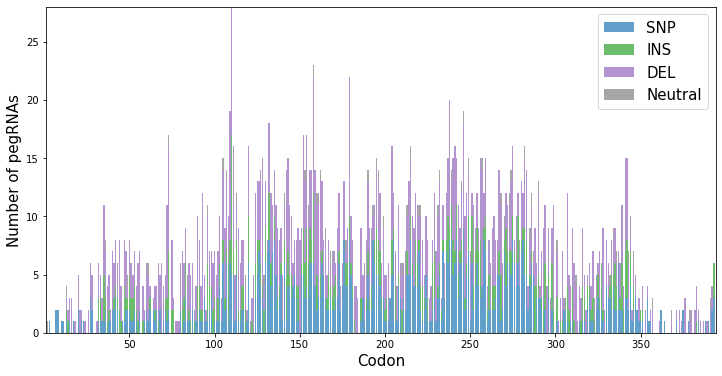

In [61]:
pegg.lollipop_library(ranked_filtered, gene_name, start_end_cds,strand, plot=True);


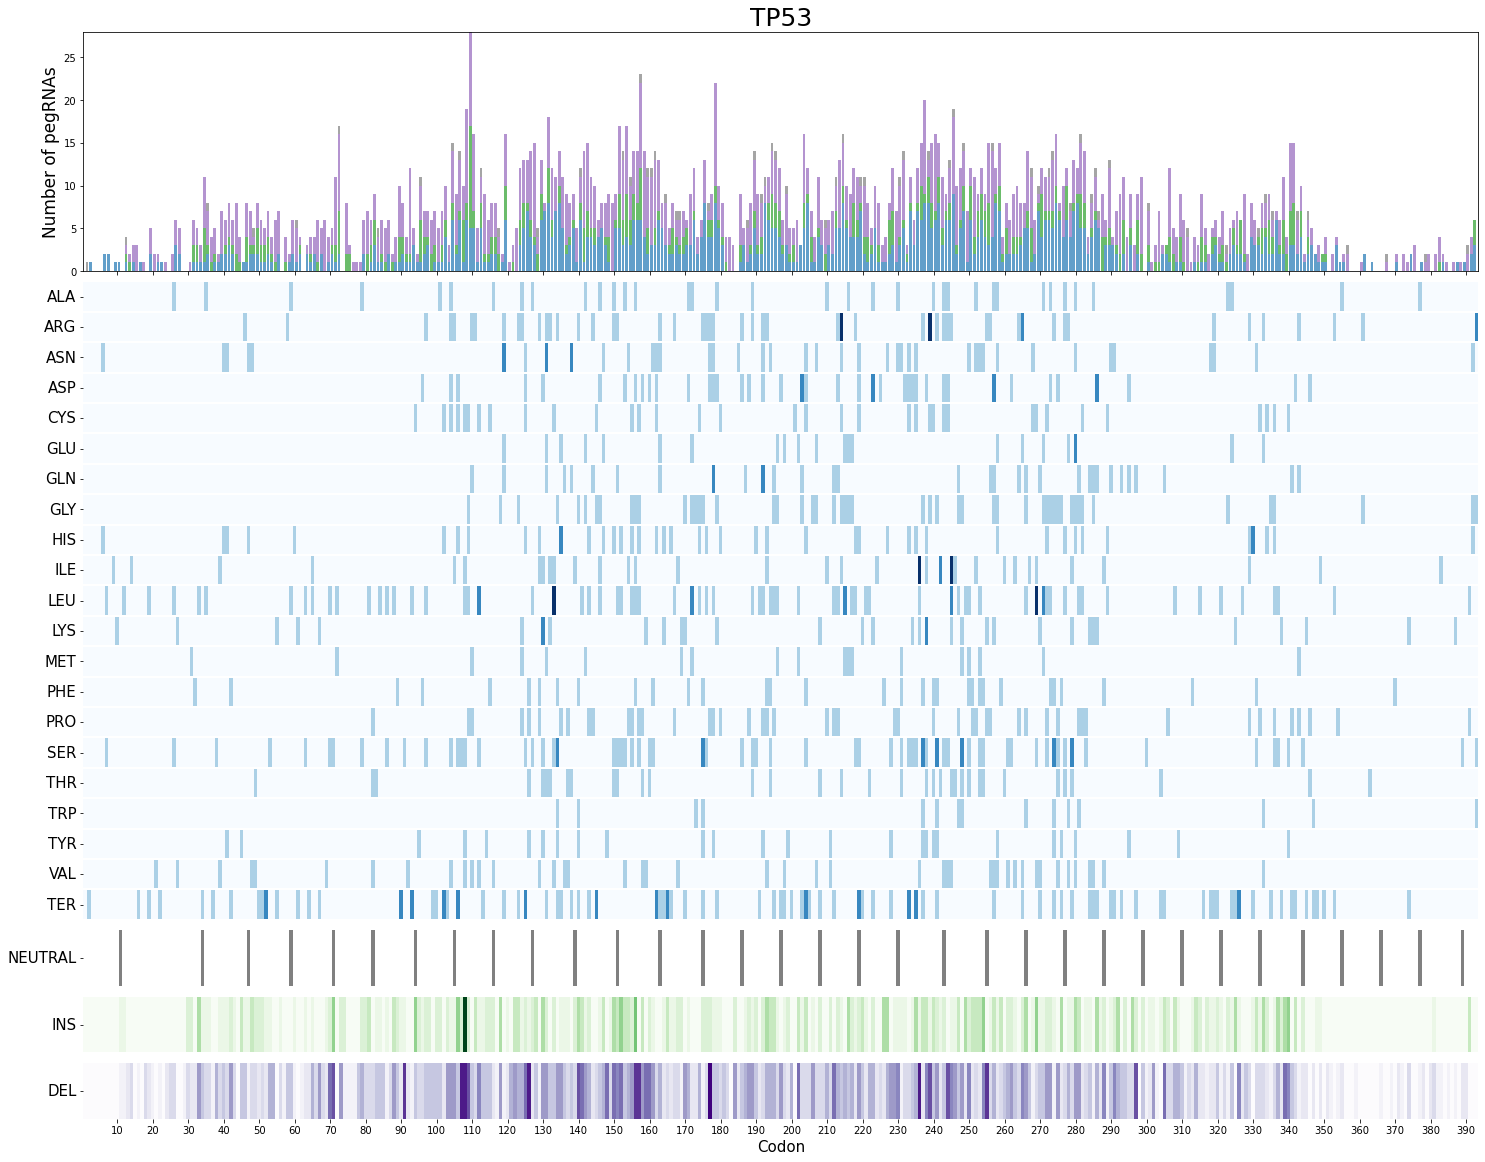

In [60]:
matrix_snp,matrix_ins, matrix_del, matrix_neutral, fig=pegg.matrix_rep_library(ranked_filtered,gene_name,start_end_cds,strand, plot=True);
fig.savefig('matrix_lib.png', dpi=250)

# Testing if it works with a different reference genome (mouse)

In [71]:
#mouse genome
file = '/Users/samgould/Desktop/FSR Lab/reference files/GRCm38.p6 (mouse)/ncbi-genomes-2022-04-04/GCF_000001635.26_GRCm38.p6_genomic.fna.gz'
with gzip.open(file, "rt") as handle:
    records_mouse = list(SeqIO.parse(handle, "fasta")) #about 4 Gb in  memory
    #records = list that contains sequences split up by chromosome (and intrachromosome splits up to some size)

#filtering out alternative sequences to only select consensus matches
wrong = ["alternate", "unplaced", "unlocalized", "patch"]
badlist = []
for key in wrong:
    for i in records_mouse:
        ii = i.description
        if key in ii:
            badlist.append(ii)
            
filtered_mouse = []
index_list_mouse = []
for idx, i in enumerate(records_mouse):
    ii = i.description
    if ii not in badlist:
        filtered_mouse.append(ii)
        index_list_mouse.append(idx)



In [72]:
#specify reference data
mutant_input = impact_data
#these aren't translated mutations (haven't been aligned to mouse genome...)


#select list of mutations to model
mut_idx_list = [422819]

PAM = 'NGG'
#if you want to check multiple RTT lengths/PBS lengths...
RTT_lengths = [20,25,30]
PBS_lengths = [5,7,10]

#generates minus strand sequences of chromosomes to speed up run time...
minus_seqs = pegg.minus_seq_generator(records, index_list)
guides_per_mut=20
#desired number of guide outputs per mutation



In [74]:
ranked_filtered = pegg.run(mutant_input, mut_idx_list, records_mouse, index_list_mouse, minus_seqs, chrom_dict, PAM, RTT_lengths, PBS_lengths, guides_per_mut)
ranked_filtered

,mutant index,gene,chr,start,end,variant_type,ref_allele,mut_allele,PAM location,PAM strand,PAM,protospacer,PBS,PBS length,RTT,RTT length,PBS_RTT_5to3,distance mut to 5' RTT,distance to nick,target sequence,target length,MIT specificity,CFD efficiency percentile,contains terminator?,contains RE site?,last templated base C?,PBS GC content,composite score
0,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,ACTACAGAAA,10,AGATCCGATAGACAAAGGTCCCAAGGGAGA,30,AGAGGGAACCCTGGAAACAGATAGCCTAGAAAAGACATCA,27,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTT...,57,none,none,no,no,no,0.300000,1.500000
1,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,ACTACAGAAA,10,AGATCCGATAGACAAAGGTCCCAAG,25,GAACCCTGGAAACAGATAGCCTAGAAAAGACATCA,22,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTT...,52,none,none,no,no,no,0.300000,1.500000
2,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,ACAGAAA,7,AGATCCGATAGACAAAGGTCCCAAG,25,GAACCCTGGAAACAGATAGCCTAGAAAAGACA,22,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTT...,52,none,none,no,no,no,0.285714,1.428571
3,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,ACAGAAA,7,AGATCCGATAGACAAAGGTCCCAAGGGAGA,30,AGAGGGAACCCTGGAAACAGATAGCCTAGAAAAGACA,27,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTT...,57,none,none,no,no,no,0.285714,1.428571
4,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,AGAAA,5,AGATCCGATAGACAAAGGTCCCAAGGGAGA,30,AGAGGGAACCCTGGAAACAGATAGCCTAGAAAAGA,27,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTT...,57,none,none,no,no,no,0.200000,1.000000
5,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,AGAAA,5,AGATCCGATAGACAAAGGTCCCAAG,25,GAACCCTGGAAACAGATAGCCTAGAAAAGA,22,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTT...,52,none,none,no,no,no,0.200000,1.000000
6,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,ACTACAGAAA,10,AGATCCGATAGACAAAGGTC,20,CTGGAAACAGATAGCCTAGAAAAGACATCA,17,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTTC,47,none,none,no,no,yes,0.300000,0.500000
7,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258763,-,CTC,AGTAATCCACCCCCCTCGGC,GAGGG,5,ACACGTGTAATCCCAGCACTTTGGGAGGCC,30,ACACGTGTAATCCCAGCACTTTGGGAGGCCGAGGG,11,19,GGCTCACACGTGTAATCCCAGCACTTTGGGAGGCCGAGGGGGGTGG...,57,none,none,no,no,no,0.800000,0.466667
8,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258763,-,CTC,AGTAATCCACCCCCCTCGGC,GAGGGGGGTG,10,ACACGTGTAATCCCAGCACTTTGGGAGGCC,30,ACACGTGTAATCCCAGCACTTTGGGAGGCCGAGGGGGGTG,11,19,GGCTCACACGTGTAATCCCAGCACTTTGGGAGGCCGAGGGGGGTGG...,57,none,none,no,no,no,0.800000,0.466667
9,422819,NRAS,chr1,115258747,115258747,SNP,C,T,115258747,+,AGG,TAGCTCCTGATGTCTTTTCT,ACAGAAA,7,AGATCCGATAGACAAAGGTC,20,CTGGAAACAGATAGCCTAGAAAAGACA,17,3,ATCTGTAGCTCCTGATGTCTTTTCTAGGCTATCTGTTTCCAGGGTTC,47,none,none,no,no,yes,0.285714,0.428571


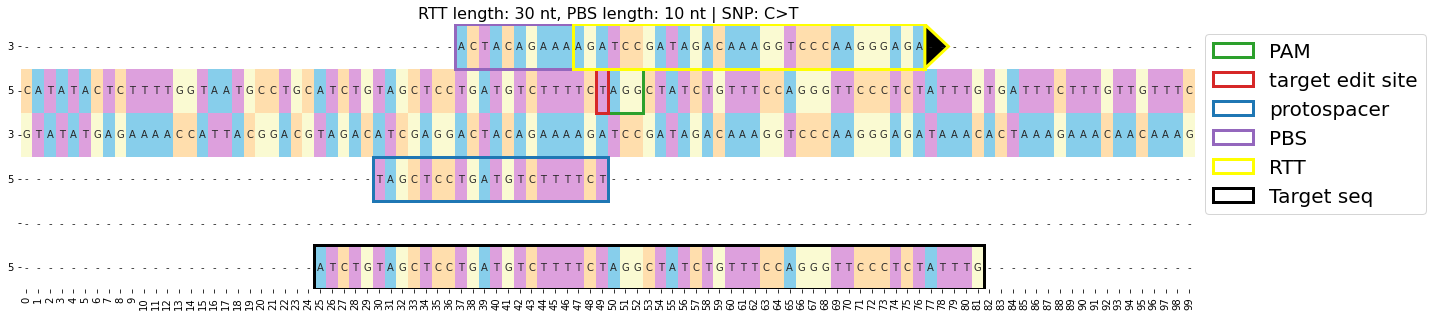

In [75]:
#visualization
pegRNA_df_loc=0 #choosing which guide to display from the above dataframe
h = pegg.pegrna_display(ranked_filtered, pegRNA_df_loc, records_mouse, index_list_mouse)

# To do

- add in automated library generation functions + visualizations...
    
- Also output a sequence with the desired edit included
    - In the sensor region of oligo
    - And at the native genetic site...
    
- test with different input mutations
- See if there's a way to compute on/off-target scores with call to CRISPOR??

Useful source for working with gencode annotation: https://medium.com/intothegenomics/annotate-genes-and-genomic-coordinates-using-python-9259efa6ffc2
